---
title: "from AR to SARIMA"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Up to this point, we learned what an AR process is, and how it relates to the concept of stationarity.

Our long term goal is to use these concepts to make forcasts (predictions) about the future. Before we do that, it is useful to talk about a generalization of the AR process, that better resembles real-life data.

## AR(p)

An **autoregressive** process $X$ is one that depend on a number of $p$ past states $X_{t-p}$.

$$
X_{t} = \phi_1\,X_{t-1} + \phi_2\,X_{t-2} + \cdots + \phi_p\,X_{t-p} + \varepsilon
$$

From what we already learned, if the complex roots of the polynomial

$$
\phi(B) = 1 - \phi_1\, B - \phi_2\,B^2 - \cdots - \phi_p\,B^p
$$

lie **outside** the unit circle, then the AR process is **causal and stationary**.


## MA(q)

Similarly, a **moving average** process $X$ is one that depend on a number of $q$ past noise steps $\varepsilon_{t-q}$.

$$
X_{t} = \varepsilon_t + \theta_1\,\varepsilon_{t-1} + \theta_2\,\varepsilon_{t-2} + \cdots + \theta_p\,\varepsilon_{t-p}
$$

This has nothing to do with the sliding averages used for smoothing we studied before, it's just the same name for a different concept.

Note that this equation is similar in structure to that of AR(p), but with weights $\theta$ standing for $\phi$, and past noise $\varepsilon_{t-q}$ standing in for past states $X_{t-p}$.

This process also has its characteristic polynomial:

$$
\theta(B) = 1 - \theta_1\, B - \theta_2\,B^2 - \cdots - \theta_p\,B^p
$$

The complex roots of this polynomial are also important. As long as the roots are **outside** the unit circle, the MA(q) process will be considered **invertible**, which is to say that it can be transformed into an AR($\infty$) process.

## ARMA(p,q)

An ARMA(p,q) process is simply the combination of an AR(p) and an MA(q) process:

$$
\begin{split}
X_{t} &= \phi_1\,X_{t-1} + \phi_2\,X_{t-2} + \cdots + \phi_p\,X_{t-p} \\
      &+ \varepsilon_t + \theta_1\,\varepsilon_{t-1} + \theta_2\,\varepsilon_{t-2} + \cdots + \theta_p\,\varepsilon_{t-p}
\end{split}
$$

## ACF and PACF

The graphs for the autocorrelation and partial autocorrrelation functions can be very useful to identify the order $p$ and $q$ of an ARMA(p,q) process.


In [19]:
#| code-summary: "import stuff"
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

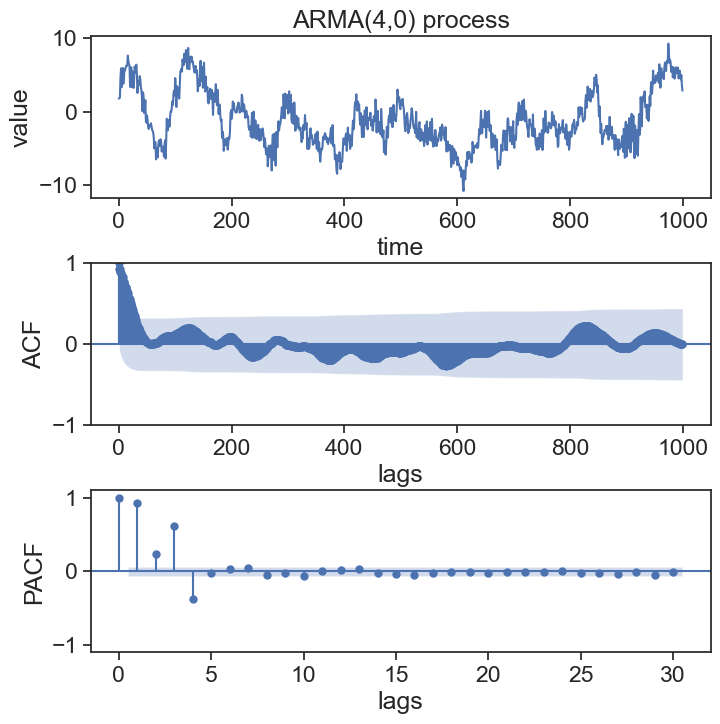

In [28]:
#| code-summary: "generate ARMA(4,0) process"
np.random.seed(0)
n = 1000  # number of data points
phi_list = np.array([0.8, -0.28, 0.8, -0.36])
ar_coefs = np.insert(-phi_list, 0, 1)  # AR coefficients
ma_coefs = [1] # MA coefficients

arma_process = ArmaProcess(ar_coefs, ma_coefs)
data = arma_process.generate_sample(nsample=n)

# Create a single figure with panels
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)


# Plot the ARMA process
ax1 = axes[0]
ax1.plot(data)
ax1.set(xlabel='time',
        ylabel='value',
        title='ARMA(4,0) process',
       )

# Plot ACF and PACF graphs
ax2 = axes[1]
sm.graphics.tsa.plot_acf(data, lags=n-1, ax=ax2, title=None)
ax2.set(ylabel="ACF",
        xlabel="lags")

ax3 = axes[2]
sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax3, title=None)
ax3.set(ylim=[-1.1, 1.1],
        ylabel='PACF',
        xlabel="lags");

Note that for the ARMA(4,0) process, the last significant PACF value is at lag $\tau=4$.

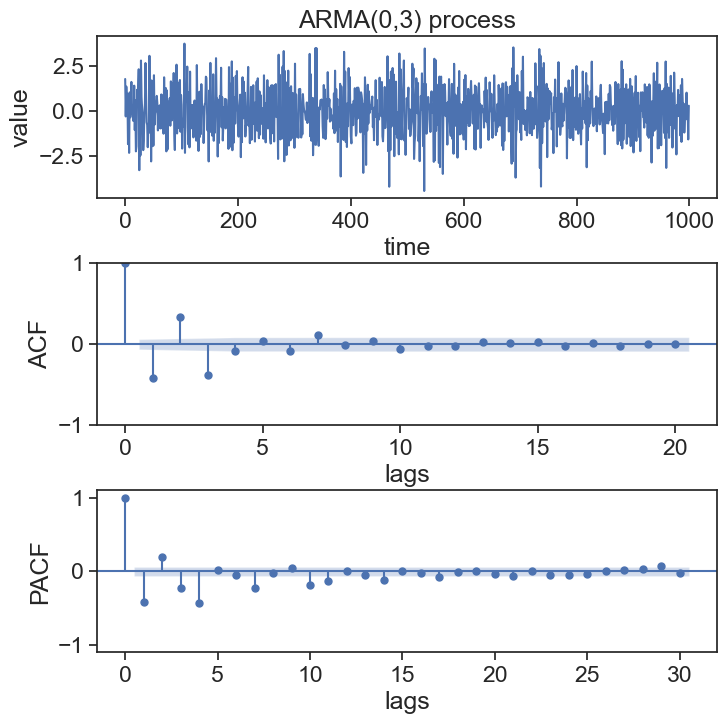

In [37]:
#| code-summary: "generate ARMA(0,3) process"
np.random.seed(0)
n = 1000  # number of data points
theta_list = np.array([0.4, -0.3, 0.8])
ma_coefs = np.insert(-theta_list, 0, 1)  # AR coefficients
ar_coefs = [1]

arma_process = ArmaProcess(ar_coefs, ma_coefs)
data = arma_process.generate_sample(nsample=n)

# Create a single figure with panels
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)


# Plot the ARMA process
ax1 = axes[0]
ax1.plot(data)
ax1.set(xlabel='time',
        ylabel='value',
        title='ARMA(0,3) process',
       )

# Plot ACF and PACF graphs
ax2 = axes[1]
sm.graphics.tsa.plot_acf(data, lags=20, ax=ax2, title=None)
ax2.set(ylabel="ACF",
        xlabel="lags")

ax3 = axes[2]
sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax3, title=None)
ax3.set(ylim=[-1.1, 1.1],
        ylabel='PACF',
        xlabel="lags");

For the ARMA(0,3) process, the last significant ACF value is at lag $\tau=3$.

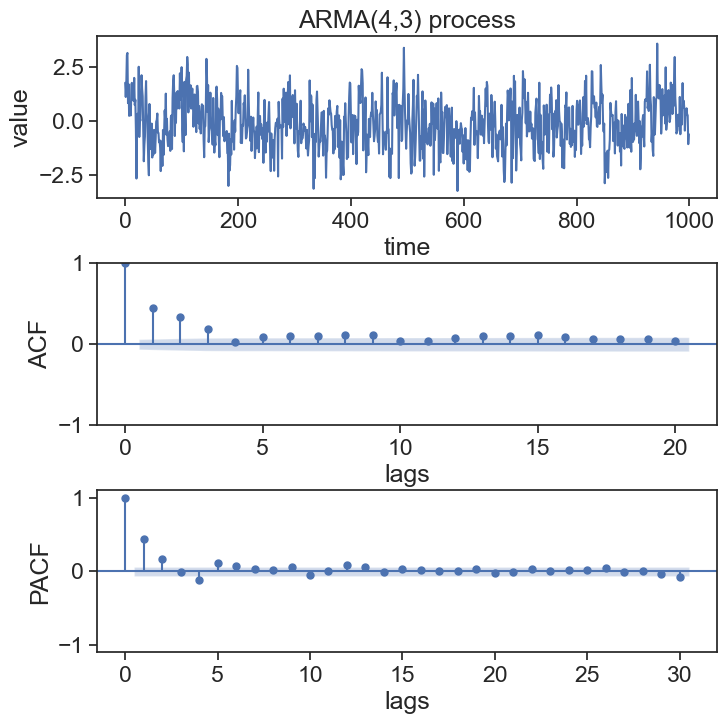

In [38]:
#| code-summary: "generate ARMA(4,3) process"
np.random.seed(0)
n = 1000  # number of data points
theta_list = np.array([0.4, -0.3, 0.8])
phi_list = np.array([0.8, -0.28, 0.8, -0.36])
ar_coefs = np.insert(-phi_list, 0, 1)  # AR coefficients
ma_coefs = np.insert(-theta_list, 0, 1)  # MA coefficients

arma_process = ArmaProcess(ar_coefs, ma_coefs)
data = arma_process.generate_sample(nsample=n)

# Create a single figure with panels
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)


# Plot the ARMA process
ax1 = axes[0]
ax1.plot(data)
ax1.set(xlabel='time',
        ylabel='value',
        title='ARMA(4,3) process',
       )

# Plot ACF and PACF graphs
ax2 = axes[1]
sm.graphics.tsa.plot_acf(data, lags=20, ax=ax2, title=None)
ax2.set(ylabel="ACF",
        xlabel="lags")

ax3 = axes[2]
sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax3, title=None)
ax3.set(ylim=[-1.1, 1.1],
        ylabel='PACF',
        xlabel="lags");

This table from @shumway2017time[p. 108] is useful to sum up what we've learned so far.

|      | AR(p)                | MA(q)                | ARMA(p,q)           |
|------|----------------------|----------------------|---------------------|
| **ACF**  | gradually goes down  | cuts off after lag q | gradually goes down |
| **PACF** | cuts off after lag p | gradually goes down  | gradually goes down |

## Non-stationary data

What do we do if it turns out that our data is not stationary? One common solution is to apply successive **differencing** operations, until the outcome seems stationary (e.g., its ACF drops to zero for $\tau\ge1$). Remember that in chapter "ACF and PACF graphs" we saw that the ACF of white noise is zero for all values of $\tau\neq 0$.

@chatfield2016analysis[chapter 3, page 63]